In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold

from pandas_profiling import ProfileReport

# Importing File 

In [31]:
train = pd.read_csv("public-train.csv",delimiter="|")

In [3]:
train.head()

,author_id,description,bookformat,bookedition,pages,published_date,publisher_id,reading_age,lexile_measure,grade_level,...,genre_1_weight,genre_2_weight,genre_3_weight,genre_4_weight,genre_5_weight,genre_6_weight,genre_7_weight,genre_8_weight,genre_9_weight,price
0,author2106,"Just after the Second World War, in the small ...",Hardcover,NaN,309.0,NaN,NaN,NaN,NaN,NaN,...,0.22,0.08,0.06,0.05,0.04,0.03,0.02,0.02,0.02,NaN
1,author1018,"Blame it on Hawaii’s rainbows, sparkling beach...",Paperback,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,author1087,"The Pulitzer Prize–winning, bestselling author...",Hardcover,NaN,496.0,NaN,NaN,NaN,NaN,NaN,...,0.22,0.08,0.08,0.05,0.05,0.04,0.02,0.02,0.02,NaN
3,author1295,THINGS ARE ABOUT TO GET SERIOUS FOR HARRY DRES...,Hardcover,First Edition,418.0,NaN,NaN,NaN,NaN,NaN,...,0.30,0.08,0.05,0.04,0.04,0.03,0.02,0.02,0.02,NaN
4,author2622,The Romanovs were the most successful dynasty ...,Hardcover,NaN,784.0,NaN,NaN,NaN,NaN,NaN,...,0.30,0.09,0.08,0.04,0.02,0.01,0.01,0.01,0.01,NaN


# Profiling Report and analysis 

profile = ProfileReport(train, title="Find IT UGM Profiling Report")

profile.to_file("Find IT UGM Profiling Report.html")

<b> Setelah melihat profiling report </b>

Hal yang patut diperhatikan (7 Mei 2021)
- terdapat deskripsi karya buku yang sama, ada apa ? kok bisa? apakah bukunya sama ? apakah buku  sama dengan edisi berbeda ?
- edisi buku memiliki banyak nilai NULL (93.5 persen), terlalu banyak miss
- edisi buku memiliki makna yang sama dengan frasa yang berbeda contoh (first edition, 1st edition, 1st dsb) <b> mesti di sama ratakan semua </b>
- published_date dan publisher_id memiliki jumlah NULL yang sama, apakah divariable yang sama ? tingkat NULL 84.0 persen (2982 NULL)
- reading_age memiliki NULL 96.5 persen dan memiliki makna yang aneh, mesti ditinjau lebih lanjut (rentangya)
- lexile_measure memiliki NULL 97.5 persen
- grade level memiliki NULL 97.2 persen
- weight memiliki NULL 85.4 persen
- kredibilitas sumber 1 tentang rating diragukan karena memiliki 84.4 persen NULL
- dimension memiliki NULL > 85.6 persen
- genre weight dan genre mesti disatukan, mungkin bisa dibuat seluruh genre dulu, trs defaultnya 0. kalau dia ada genre apa baru di isi sesuai weightnya  gitu

<b> VARIABEL PRICE NULL SEBANYAK 84.7 PERSEN PADAHAL INI BAGIAN YANG PENGEN DIPREDIKSI, TRUS GIMNA ???? </b>


# Mencoba analisis data 

In [4]:
trainPrice = train[train['price'].isna()==False]

ProfileReport(trainPrice,title="Find IT UGM Profiling Report without price NULL").to_file("Find IT UGM Profiling Report without price NULL.html")

In [5]:
trainPrice.head(5)

,author_id,description,bookformat,bookedition,pages,published_date,publisher_id,reading_age,lexile_measure,grade_level,...,genre_1_weight,genre_2_weight,genre_3_weight,genre_4_weight,genre_5_weight,genre_6_weight,genre_7_weight,genre_8_weight,genre_9_weight,price
9,author0932,"At long last, New York Times bestselling autho...",Mass Market Paperback,NaN,504.0,"February 28, 2012",publisher149,NaN,NaN,NaN,...,0.21,0.17,0.10,0.08,0.05,0.04,0.04,0.03,0.02,98172.0
17,author2279,I sold my future to the man who ruined my past...,Kindle Edition,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,57604.0
29,author2386,"From Rob Thomas, the creator of groundbreaking...",Paperback,NaN,324.0,"March 25, 2014",publisher381,NaN,NaN,NaN,...,0.19,0.07,0.07,0.06,0.05,0.04,0.04,0.03,0.02,103658.0
33,author2769,"Hannis Arc, working on the tapestry of lines l...",Hardcover,NaN,528.0,"August 16, 2011",publisher099,NaN,NaN,NaN,...,0.07,0.05,0.02,0.02,0.02,0.02,0.01,0.01,0.01,649665.0
44,author0473,C.A. Nicholas's magnum opus symphony is about ...,Paperback,NaN,500.0,"May 5, 2019",publisher184,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,247883.0


In [6]:
train = trainPrice

In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 543 entries, 9 to 3541
Data columns (total 39 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   author_id       543 non-null    object 
 1   description     533 non-null    object 
 2   bookformat      543 non-null    object 
 3   bookedition     51 non-null     object 
 4   pages           511 non-null    float64
 5   published_date  499 non-null    object 
 6   publisher_id    499 non-null    object 
 7   reading_age     119 non-null    object 
 8   lexile_measure  85 non-null     object 
 9   grade_level     95 non-null     object 
 10  weight          457 non-null    float64
 11  rating_value_0  543 non-null    float64
 12  rating_value_1  484 non-null    float64
 13  rating_count_0  543 non-null    int64  
 14  rating_count_1  543 non-null    int64  
 15  dimension_0     456 non-null    float64
 16  dimension_1     456 non-null    float64
 17  dimension_2     443 non-null    fl

# Ploting 

<AxesSubplot:xlabel='bookformat', ylabel='price'>

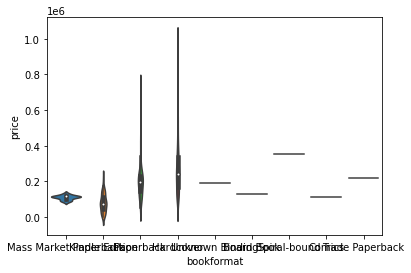

In [8]:
sns.violinplot(y=train["price"],x=train["bookformat"])

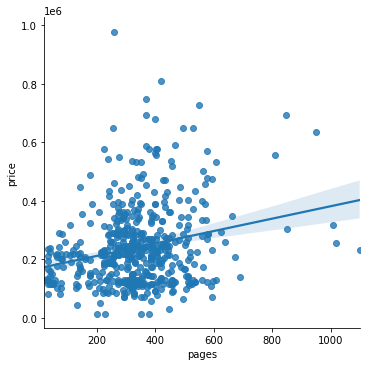

In [9]:
sns.lmplot(y="price",x="pages",data=train)

In [10]:
train.bookformat.unique()

array(['Mass Market Paperback', 'Kindle Edition', 'Paperback',
       'Hardcover', 'Unknown Binding', 'Board Book', 'Spiral-bound',
       'Comics', 'Trade Paperback'], dtype=object)

In [11]:
train.grade_level.unique()

array([nan, '9 - 12', '3 - 7', '7 - 9', '10 - 12', '10 and up',
       'Preschool - Kindergarten', '7 - 12', '5 - 6', 'Kindergarten - 3',
       '6 - 9', '5 - 9', '4 - 7', 'Preschool - 1', 'Preschool - 3',
       '8 - 12', '8 - 9', '8 and up', '9 and up', '1 - 2',
       'Preschool - 2', '4 - 6', '7 and up', '5 - 8', '5 - 7'],
      dtype=object)

In [14]:
train.lexile_measure.value_counts()

710L      5
HL710L    3
850L      3
740L      3
770L      3
710       2
HL580L    2
HL740L    2
HL750L    2
920L      2
640L      2
950L      2
990L      2
690       2
AD380L    2
690L      2
790L      2
HL680L    2
760L      2
AD300L    1
AD550L    1
930L      1
GN400L    1
HL600L    1
860L      1
AD510L    1
130L      1
AD650L    1
630L      1
1170L     1
AD600L    1
HL720L    1
800L      1
960L      1
930       1
360L      1
HL700L    1
1010L     1
HL790L    1
670       1
880L      1
970       1
570L      1
AD460L    1
HL780L    1
AD450L    1
HL730L    1
840L      1
AD490L    1
720L      1
940L      1
730L      1
1100L     1
980L      1
NP        1
GN370L    1
AD660L    1
230L      1
HL590L    1
Name: lexile_measure, dtype: int64

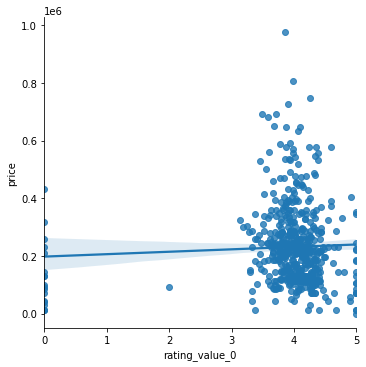

In [38]:
sns.lmplot(y="price",x="rating_value_0",data=train)

In [32]:
tempt = train[train["genre_0"]=="Nonfiction"]

In [33]:
tempt.genre_0_weight.describe()

count    564.000000
mean       0.377784
std        0.116437
min        0.200000
25%        0.310000
50%        0.360000
75%        0.410000
max        1.000000
Name: genre_0_weight, dtype: float64

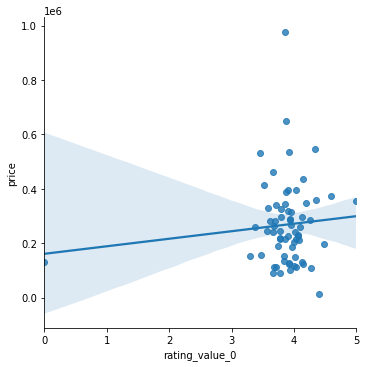

In [36]:
sns.lmplot(y="price",x="rating_value_0",data=tempt)

In [35]:
tempt.price.describe()

count        67.000000
mean     268151.089552
std      153383.361588
min       14293.000000
25%      152671.000000
50%      244707.000000
75%      335371.500000
max      978395.000000
Name: price, dtype: float64